## Flotation Data

* The dataset was obtained from a mineral processing plant separating silica from iron ore using the reverse cationic flotation method. Continuous process data were collected from 1 a.m. on March 10, 2017 to 11 p.m. on September 9, 2017.

* Each row of data consists of 23 measurements that can be categorized into four types:

 * raw materials (column 2-3);
 * environment variables (column 4-8);
 * process variables (column 9-22);
 * processed materials (column 23-24).

# Summary
**This dataset is about a flotation plant which is a process used to concentrate the iron ore. This process is very common in a mining plant.**


# Goal of this dataset
**The target is to predict the % of Silica in the end of the process, which is the concentrate of iron ore and its impurity (which is the % of Silica).**



# Why prediction is needed
**Although the % of Silica is measured (last column), its a lab measurement, which means that it takes at least one hour for the process engineers to have this value. So if it is posible to predict the amount of impurity in the process**



# Import Library & Read Dataset

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate

import joblib

In [6]:
sns.set(rc = {"figure.figsize" : [20,20]} , font_scale = 1.1)

## Read and Explore Data

In [7]:
df = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")


In [8]:
df.head()

date % Iron Feed % Silica Feed Starch Flow Amina Flow  \
0  2017-03-10 01:00:00        55,2         16,98     3019,53    557,434   
1  2017-03-10 01:00:00        55,2         16,98     3024,41    563,965   
2  2017-03-10 01:00:00        55,2         16,98     3043,46    568,054   
3  2017-03-10 01:00:00        55,2         16,98     3047,36    568,665   
4  2017-03-10 01:00:00        55,2         16,98     3033,69    558,167   

  Ore Pulp Flow Ore Pulp pH Ore Pulp Density Flotation Column 01 Air Flow  \
0       395,713     10,0664             1,74                      249,214   
1       397,383     10,0672             1,74                      249,719   
2       399,668      10,068             1,74                      249,741   
3       397,939     10,0689             1,74                      249,917   
4       400,254     10,0697             1,74                      250,203   

  Flotation Column 02 Air Flow  ... Flotation Column 07 Air Flow  \
0                      253,235  ...                      250,884   
1                      250,532  ...                      248,994   
2                      247,874  ...                      248,071   
3                      254,487  ...                      251,147   
4                      252,136  ...                      248,928   

  Flotation Column 01 Level Flotation Column 02 Level  \
0                   457,396                   432,962   
1                   451,891                    429,56   
2                    451,24                   468,927   
3                   452,441                   458,165   
4                   452,441                     452,9   

  Flotation Column 03 Level Flotation Column 04 Level  \
0                   424,954                   443,558   
1                   432,939                   448,086   
2                    434,61                   449,688   
3                   442,865                    446,21   
4                   450,523                    453,67   

  Flotation Column 05 Level Flotation Column 06 Level  \
0                   502,255                    446,37   
1                   496,363                   445,922   
2                   484,411                   447,826   
3                   471,411                    437,69   
4                   462,598                   443,682   

  Flotation Column 07 Level % Iron Concentrate % Silica Concentrate  
0                   523,344              66,91                 1,31  
1                   498,075              66,91                 1,31  
2                   458,567              66,91                 1,31  
3                   427,669              66,91                 1,31  
4                   425,679              66,91                 1,31  

[5 rows x 24 columns]

## Data Field Descriptions


 1. **date**:Date and Timestampe .
 2. **% Iron Feed**: percentage of Iron that comes from the iron ore that is being fed into the flotation cells
 3. **% Silica Feed**: percentage of silica (impurity) that comes from the iron ore that is being fed into the flotation cells
 4. **Starch Flow**: Starch (reagent) Flow measured in m3/h
 5. **Amina Flow**: Amina (reagent) Flow measured in m3/h
 6. **Ore Pulp Flow**: t/h
 7. **Ore Pulp pH**: pH scale from 0 to 14
 8. **Ore Pulp Density**: Density scale from 1 to 3 kg/cm³
 9. **Air Flow Flotation Columns**: process data (Airflow that goes into the flotation cell measured in Nm³/h)
 10. **Flotation Columns Levels**: process data (Froth level in the flotation cell measured in mm)
 11. **% Iron Concentrate**: percentage of Iron which represents how much iron is presented at the end of the flotation process (0-100%, lab measurement)
 12. **% sillica Concentrate**: percentage of silica which represents how much iron is presented at the end of the flotation process (0-100%, lab measurement)

In [9]:
#Check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [10]:
df["date"] = pd.to_datetime(df["date"] , format = "%Y-%m-%d %H:%M") 
df["Month_Name"] = df["date"].dt.month_name()
df["Day_Name"] = df["date"].dt.day_name()
df["Hour"] = df["date"].dt.hour

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  object        
 2   % Silica Feed                 737453 non-null  object        
 3   Starch Flow                   737453 non-null  object        
 4   Amina Flow                    737453 non-null  object        
 5   Ore Pulp Flow                 737453 non-null  object        
 6   Ore Pulp pH                   737453 non-null  object        
 7   Ore Pulp Density              737453 non-null  object        
 8   Flotation Column 01 Air Flow  737453 non-null  object        
 9   Flotation Column 02 Air Flow  737453 non-null  object        
 10  Flotation Column 03 Air Flow  737453 non-null  object        
 11  Flotation Col

In [12]:
columns = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate']
columns

['% Iron Feed',
 '% Silica Feed',
 'Starch Flow',
 'Amina Flow',
 'Ore Pulp Flow',
 'Ore Pulp pH',
 'Ore Pulp Density',
 'Flotation Column 01 Air Flow',
 'Flotation Column 02 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 04 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 06 Air Flow',
 'Flotation Column 07 Air Flow',
 'Flotation Column 01 Level',
 'Flotation Column 02 Level',
 'Flotation Column 03 Level',
 'Flotation Column 04 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Level',
 'Flotation Column 07 Level',
 '% Iron Concentrate',
 '% Silica Concentrate']

In [13]:
for column in columns:
    df[column] = df[column].str.replace(',','.')
    df[column] = pd.to_numeric(df[column] , errors="coerce")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

In [15]:
#Describe Numerical Values
df.describe().T

count         mean          std         min  \
% Iron Feed                   737453.0    56.294739     5.157744   42.740000   
% Silica Feed                 737453.0    14.651716     6.807439    1.310000   
Starch Flow                   737453.0  2869.140569  1215.203734    0.002026   
Amina Flow                    737453.0   488.144697    91.230534  241.669000   
Ore Pulp Flow                 737453.0   397.578372     9.699785  376.249000   
Ore Pulp pH                   737453.0     9.767639     0.387007    8.753340   
Ore Pulp Density              737453.0     1.680380     0.069249    1.519820   
Flotation Column 01 Air Flow  737453.0   280.151856    29.621288  175.510000   
Flotation Column 02 Air Flow  737453.0   277.159965    30.149357  175.156000   
Flotation Column 03 Air Flow  737453.0   281.082397    28.558268  176.469000   
Flotation Column 04 Air Flow  737453.0   299.447794     2.572538  292.195000   
Flotation Column 05 Air Flow  737453.0   299.917814     3.636579  286.295000   
Flotation Column 06 Air Flow  737453.0   292.071485    30.217804  189.928000   
Flotation Column 07 Air Flow  737453.0   290.754856    28.670105  185.962000   
Flotation Column 01 Level     737453.0   520.244823   131.014924  149.218000   
Flotation Column 02 Level     737453.0   522.649555   128.165050  210.752000   
Flotation Column 03 Level     737453.0   531.352662   150.842164  126.255000   
Flotation Column 04 Level     737453.0   420.320973    91.794432  162.201000   
Flotation Column 05 Level     737453.0   425.251706    84.535822  166.991000   
Flotation Column 06 Level     737453.0   429.941018    89.862225  155.841000   
Flotation Column 07 Level     737453.0   421.021231    84.891491  175.349000   
% Iron Concentrate            737453.0    65.050068     1.118645   62.050000   
% Silica Concentrate          737453.0     2.326763     1.125554    0.600000   
Hour                          737453.0    11.507301     6.924463    0.000000   

                                      25%          50%          75%  \
% Iron Feed                     52.670000    56.080000    59.720000   
% Silica Feed                    8.940000    13.850000    19.600000   
Starch Flow                   2076.320000  3018.430000  3727.730000   
Amina Flow                     431.796000   504.393000   553.257000   
Ore Pulp Flow                  394.264000   399.249000   402.968000   
Ore Pulp pH                      9.527360     9.798100    10.038000   
Ore Pulp Density                 1.647310     1.697600     1.728330   
Flotation Column 01 Air Flow   250.281000   299.344000   300.149000   
Flotation Column 02 Air Flow   250.457000   296.223000   300.690000   
Flotation Column 03 Air Flow   250.855000   298.696000   300.382000   
Flotation Column 04 Air Flow   298.262566   299.805000   300.638000   
Flotation Column 05 Air Flow   298.068000   299.887120   301.791137   
Flotation Column 06 Air Flow   262.541000   299.477000   303.061000   
Flotation Column 07 Air Flow   256.302000   299.011000   301.904000   
Flotation Column 01 Level      416.978000   491.878000   594.114000   
Flotation Column 02 Level      441.883000   495.956000   595.464000   
Flotation Column 03 Level      411.325000   494.318000   601.249000   
Flotation Column 04 Level      356.679000   411.974000   485.549000   
Flotation Column 05 Level      357.653000   408.773000   484.329000   
Flotation Column 06 Level      358.497000   424.664575   492.684000   
Flotation Column 07 Level      356.772000   411.065000   476.465000   
% Iron Concentrate              64.370000    65.210000    65.860000   
% Silica Concentrate             1.440000     2.000000     3.010000   
Hour                             5.000000    12.000000    18.000000   

                                     max  
% Iron Feed                     65.78000  
% Silica Feed                   33.40000  
Starch Flow                   6300.23000  
Amina Flow                     739.53800  
Ore Pulp Flow                  418.64100 

<AxesSubplot:>

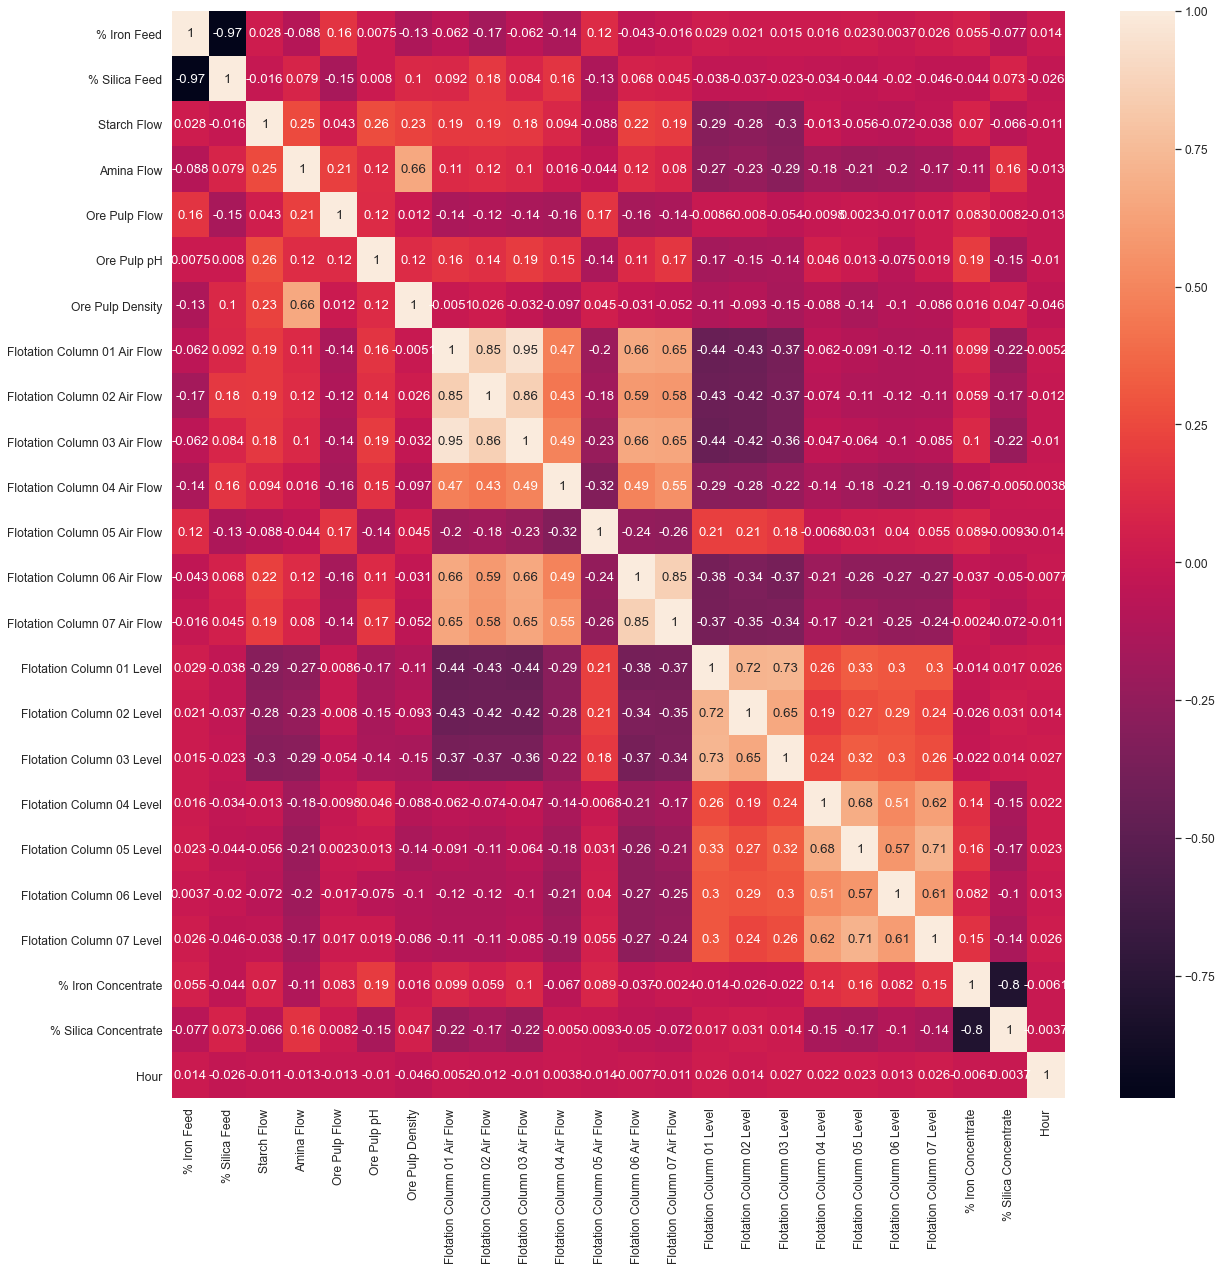

In [16]:
sns.heatmap(df.corr(), annot = True)

Text(0.5, 1.0, 'Silica Concentrate in %')

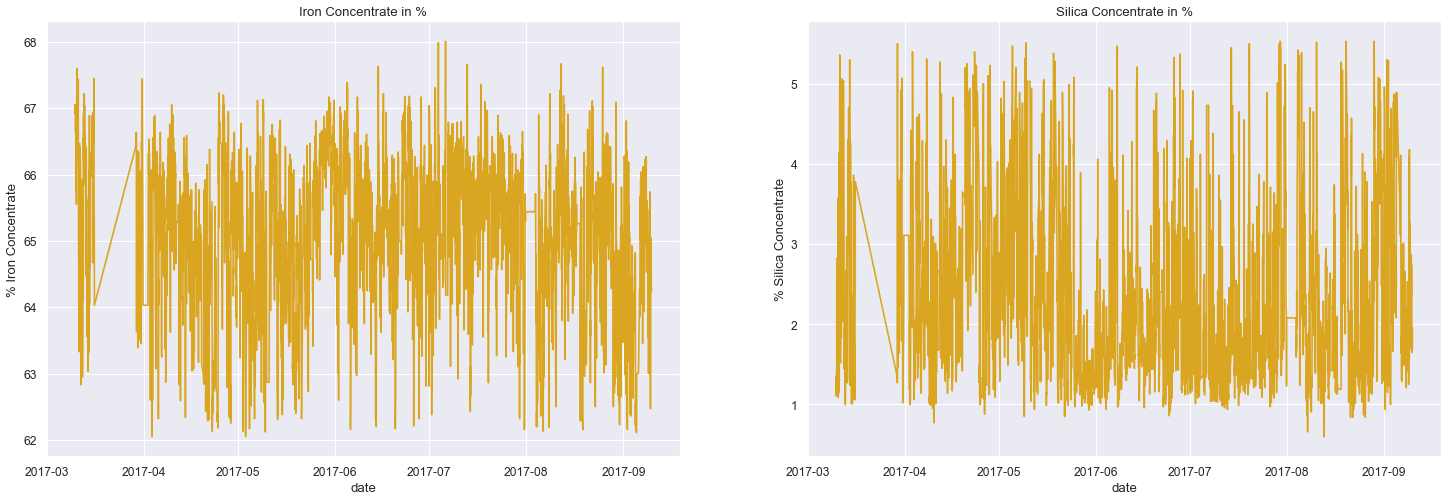

In [17]:
plt.figure(figsize=(25,8))

plt.subplot(1, 2, 1)
sns.lineplot(data=df,x='date',y='% Iron Concentrate',color='goldenrod')
plt.title('Iron Concentrate in %')
plt.subplot(1, 2, 2)
sns.lineplot(data=df,x='date',y='% Silica Concentrate',color='goldenrod')
plt.title('Silica Concentrate in %')

In [18]:
df.drop(columns="date" , inplace=True)

<AxesSubplot:xlabel='% Iron Feed', ylabel='% Silica Feed'>

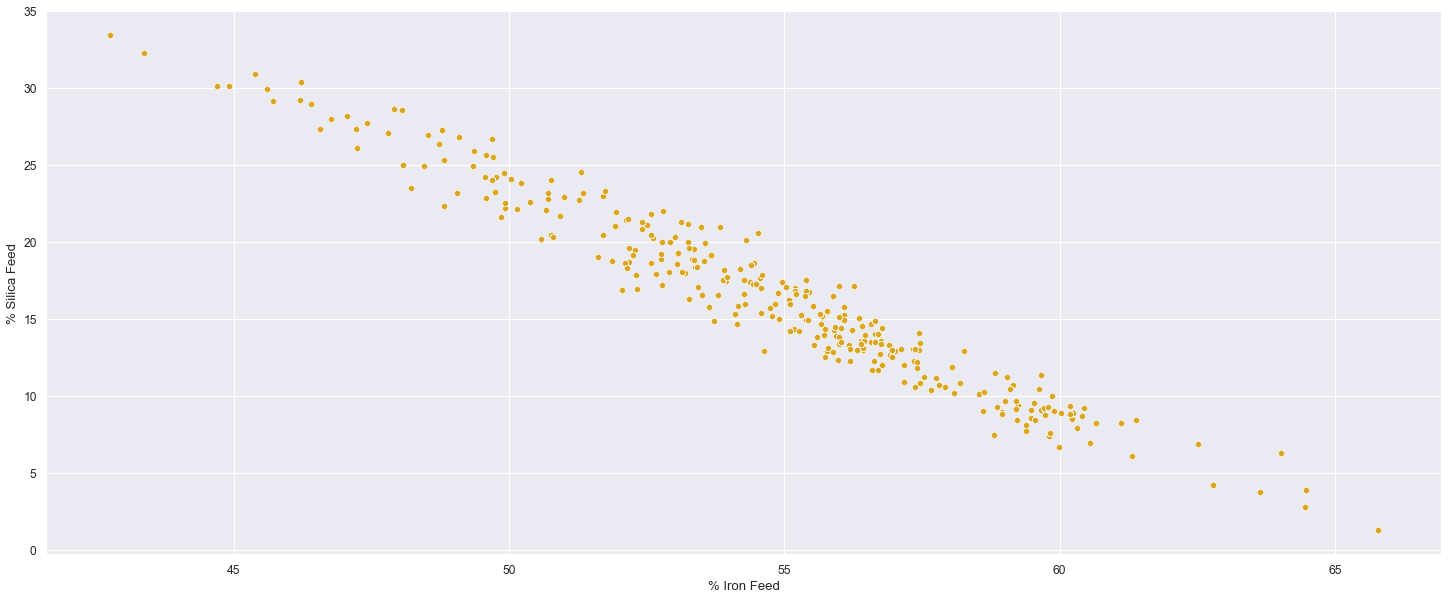

In [19]:
plt.figure(figsize=(25,10))

sns.scatterplot(data = df, x = '% Iron Feed', y = '% Silica Feed',color='goldenrod')

<AxesSubplot:xlabel='% Iron Feed', ylabel='% Iron Concentrate'>

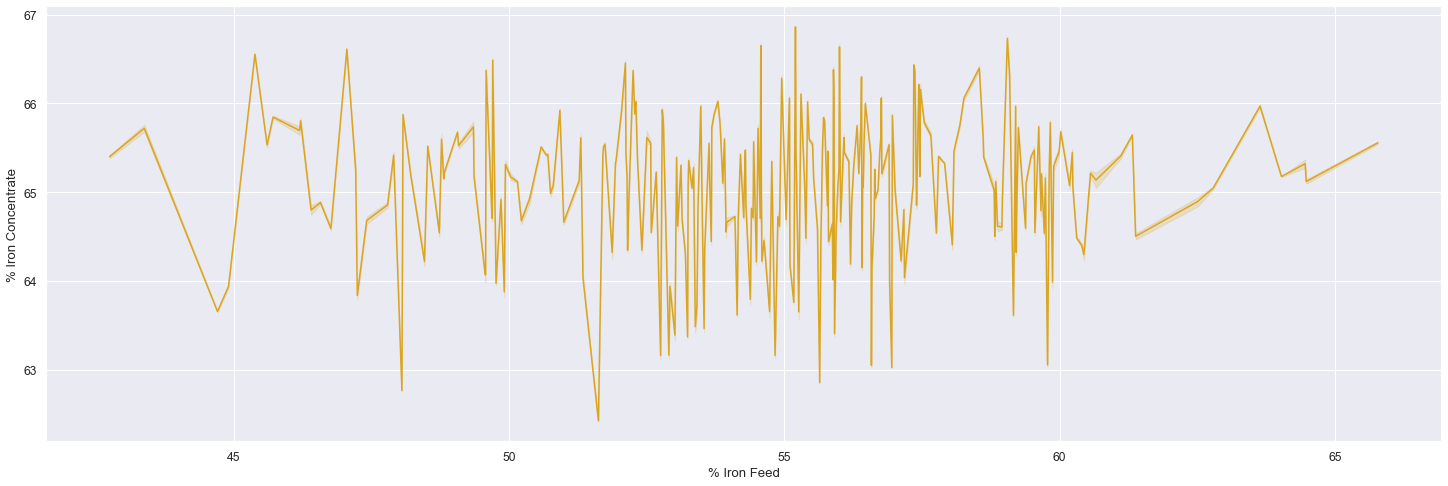

In [20]:
plt.figure(figsize=(25,8))

sns.lineplot(data=df,x='% Iron Feed',y='% Iron Concentrate',color='goldenrod')



<AxesSubplot:xlabel='% Silica Feed', ylabel='% Silica Concentrate'>

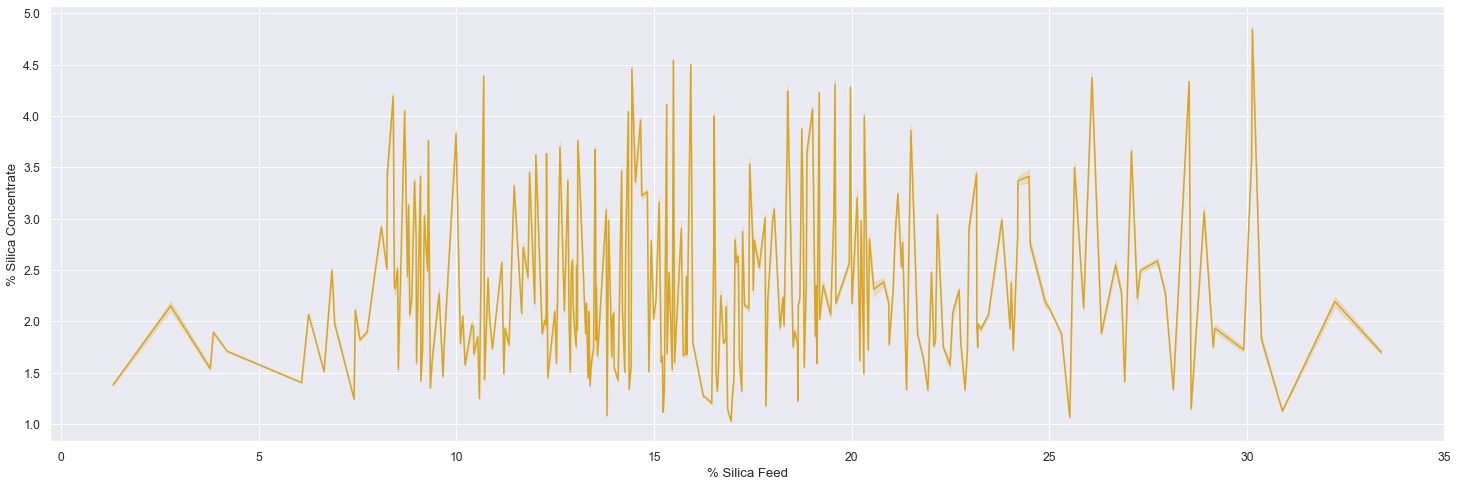

In [21]:
plt.figure(figsize=(25,8))

sns.lineplot(data=df,x='% Silica Feed',y='% Silica Concentrate',color='goldenrod')


<AxesSubplot:xlabel='% Silica Feed', ylabel='% Iron Feed'>

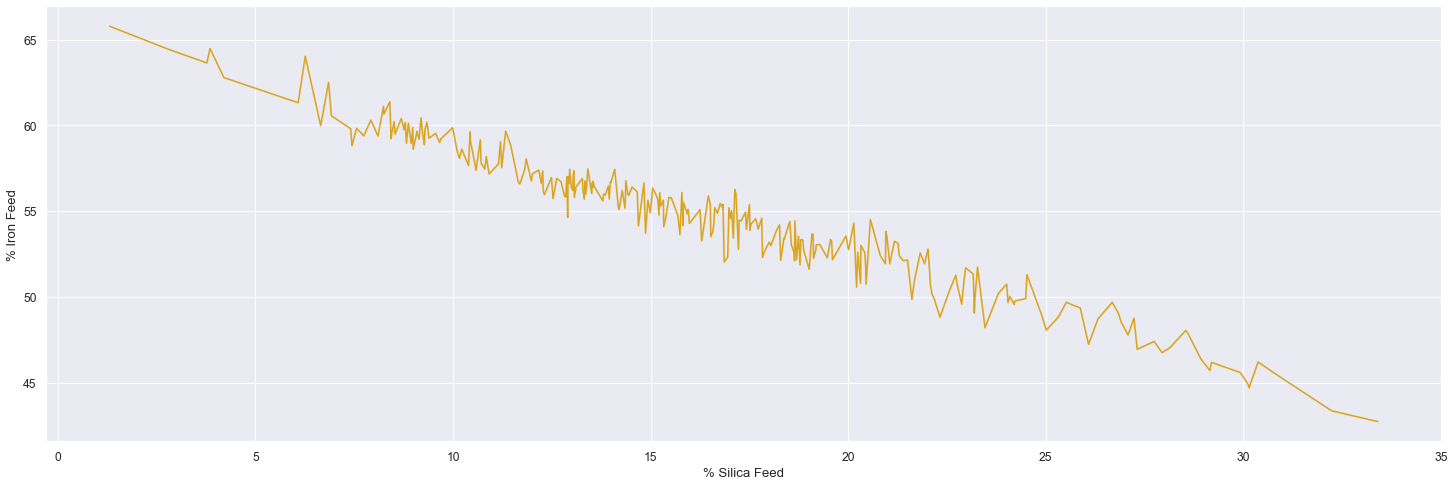

In [22]:
plt.figure(figsize=(25,8))

sns.lineplot(data=df,x='% Silica Feed',y='% Iron Feed',color='goldenrod')


<AxesSubplot:xlabel='% Iron Concentrate', ylabel='% Silica Concentrate'>

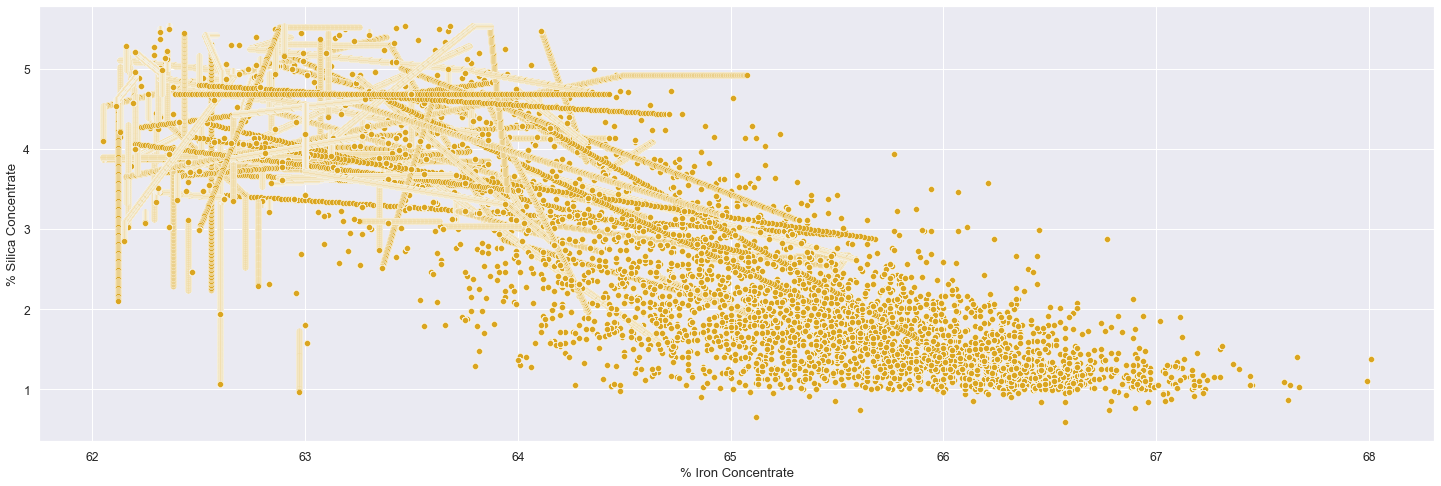

In [23]:
plt.figure(figsize=(25,8))

sns.scatterplot(x=df['% Iron Concentrate'], y=df['% Silica Concentrate'],color='goldenrod')

C:\Users\oessa\anaconda3\lib\site-packages\seaborn\axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


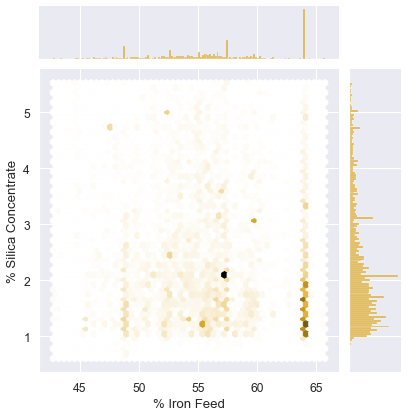

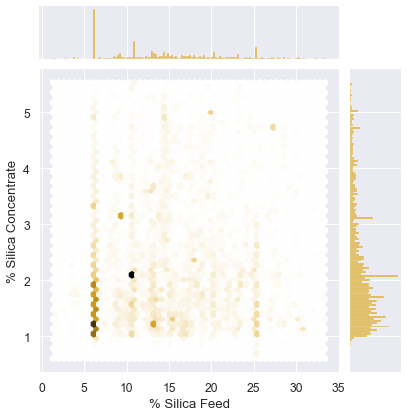

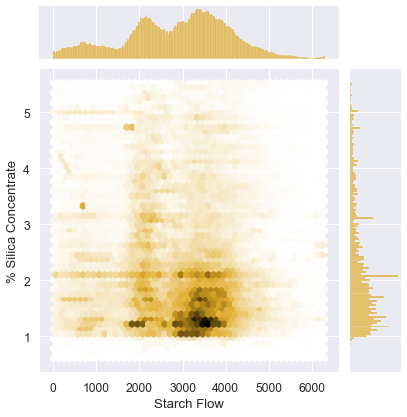

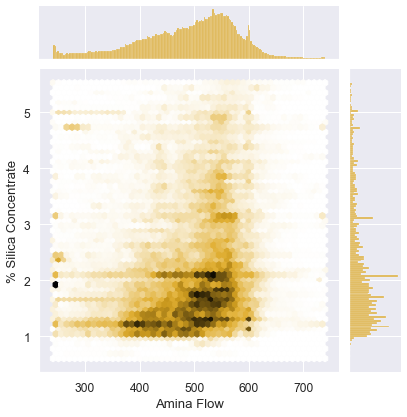

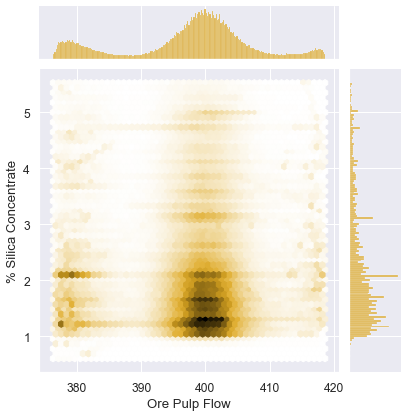

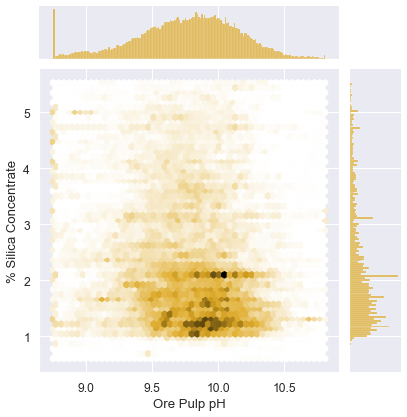

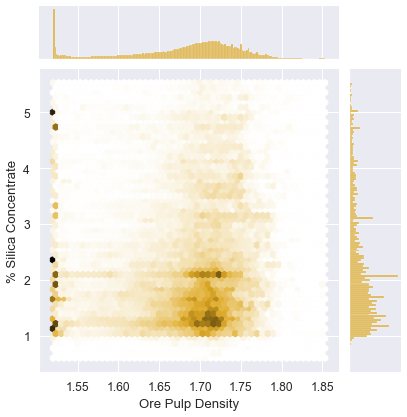

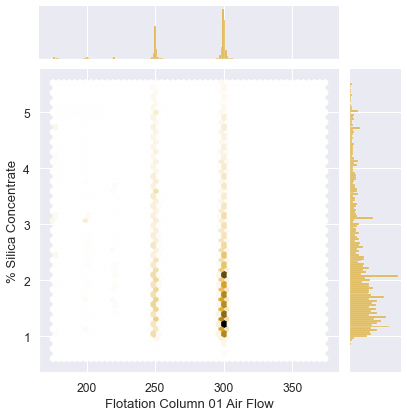

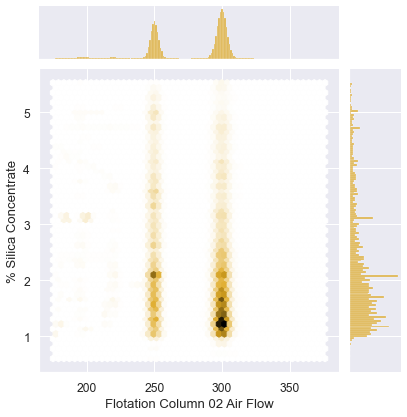

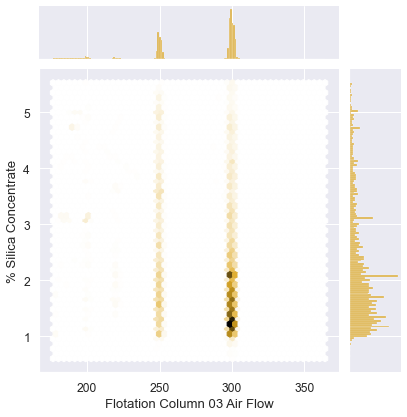

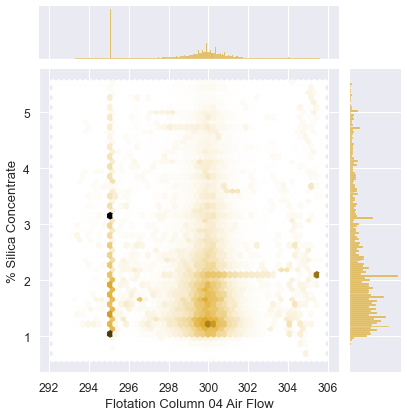

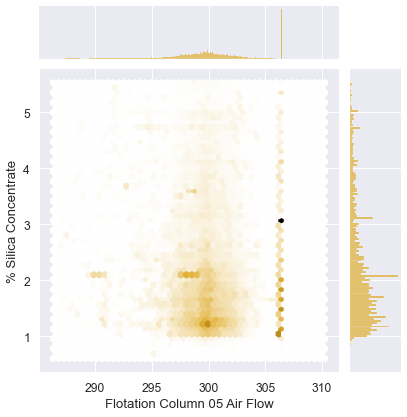

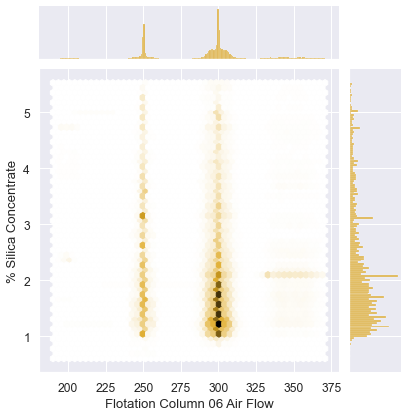

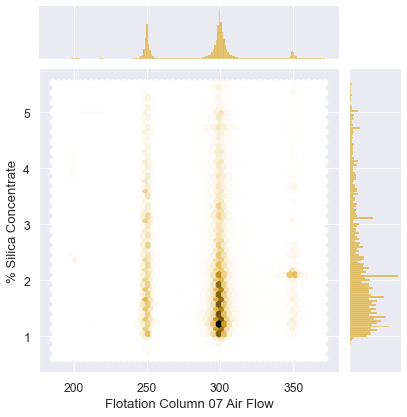

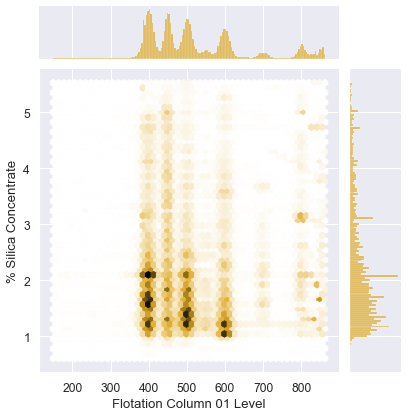

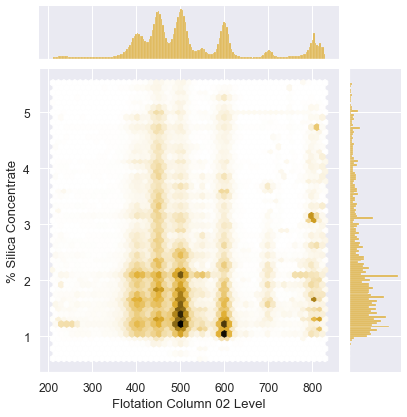

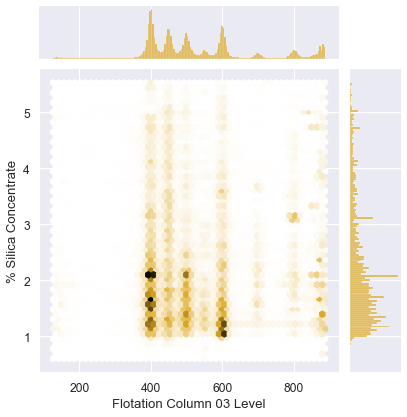

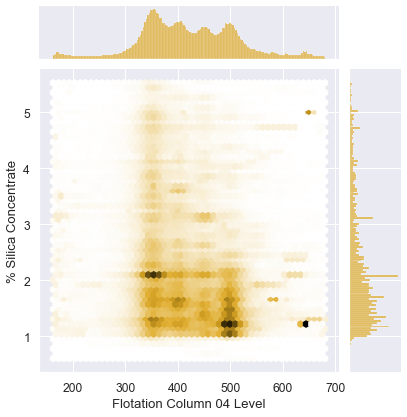

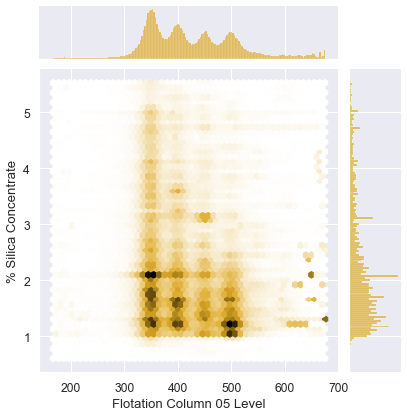

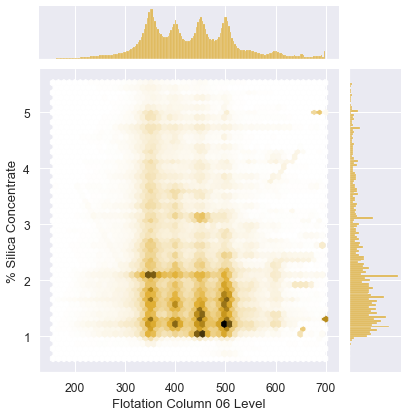

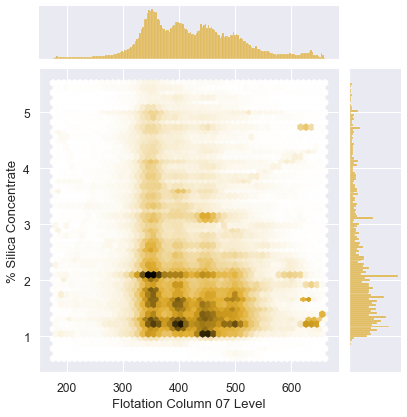

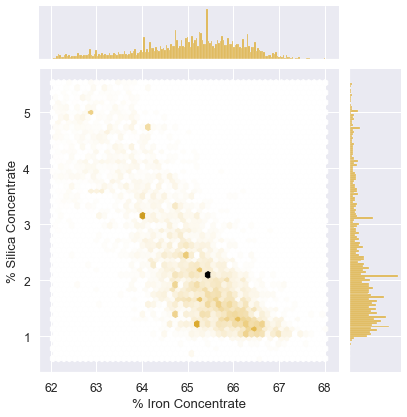

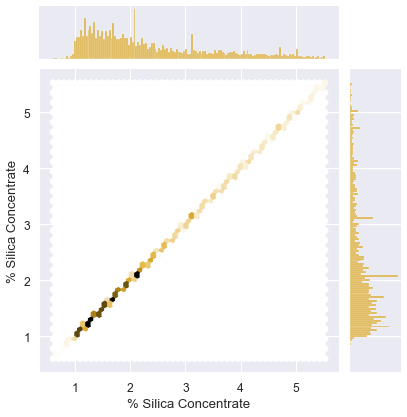

In [24]:
for column in columns:
    sns.jointplot(data = df , y = "% Silica Concentrate" , x = df[column] , kind="hex",color='goldenrod')

<ipython-input-25-92f9133164c0>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,8))


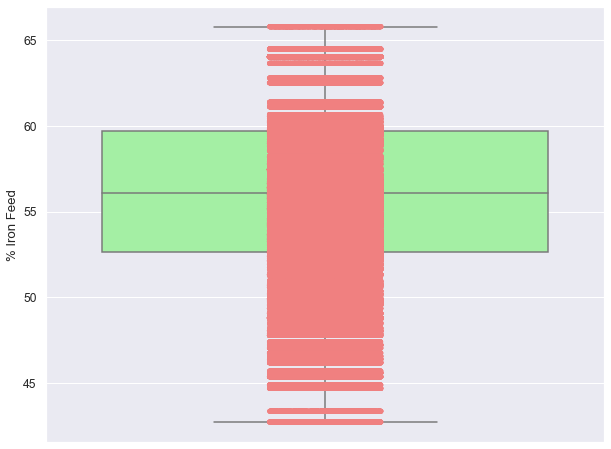

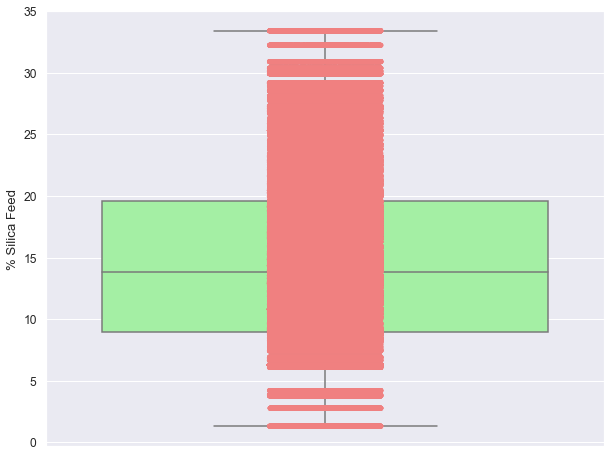

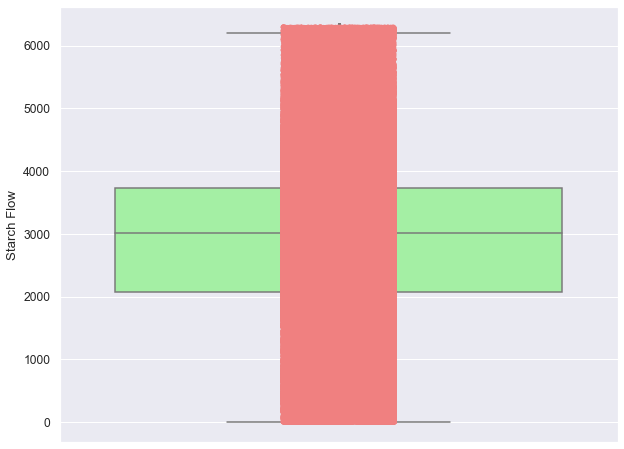

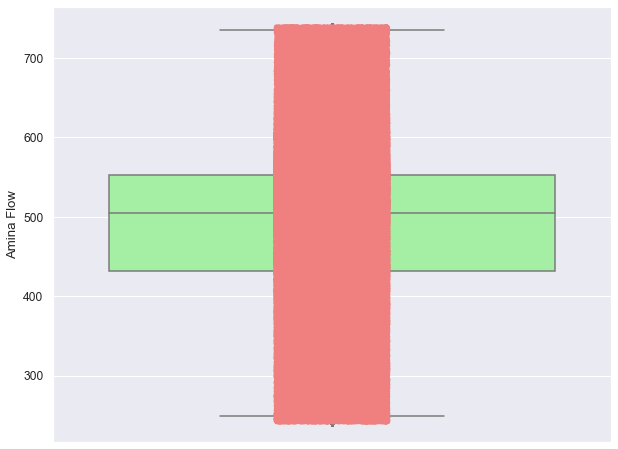

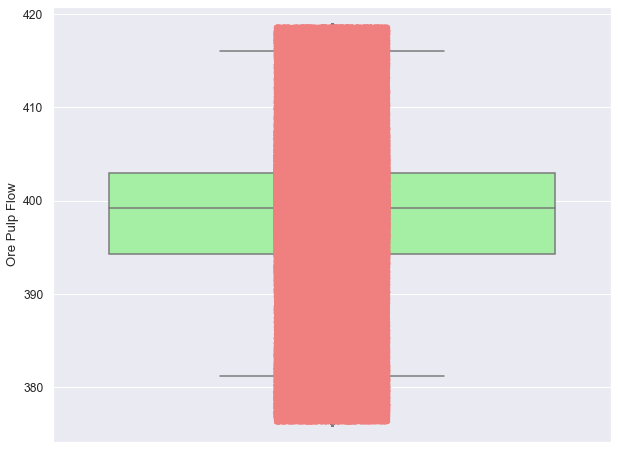

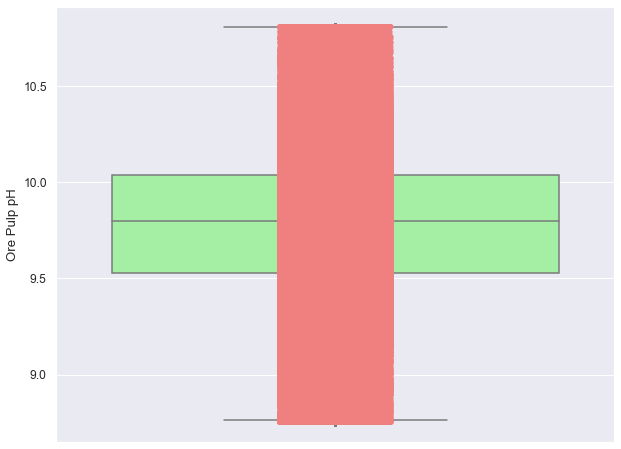

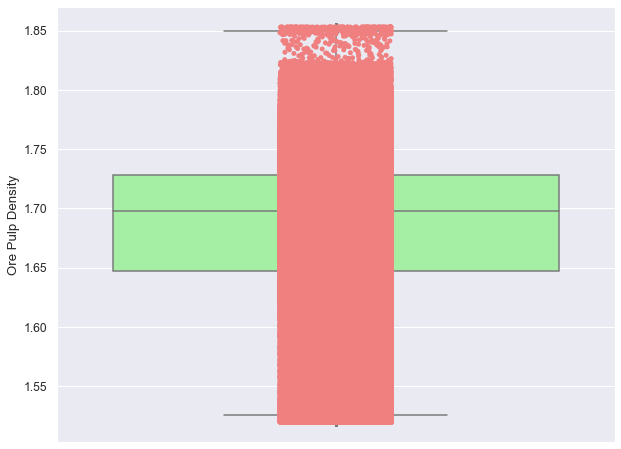

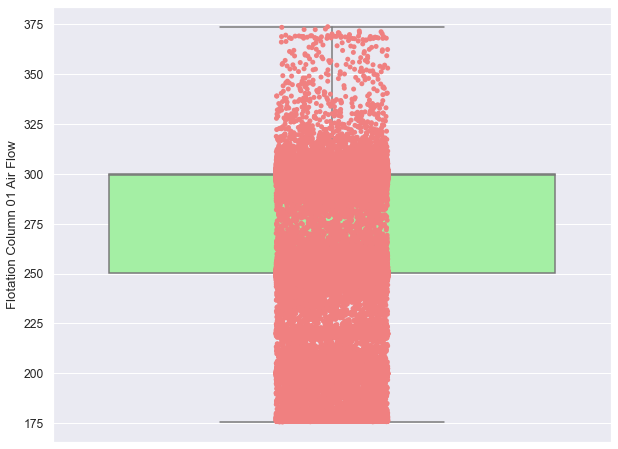

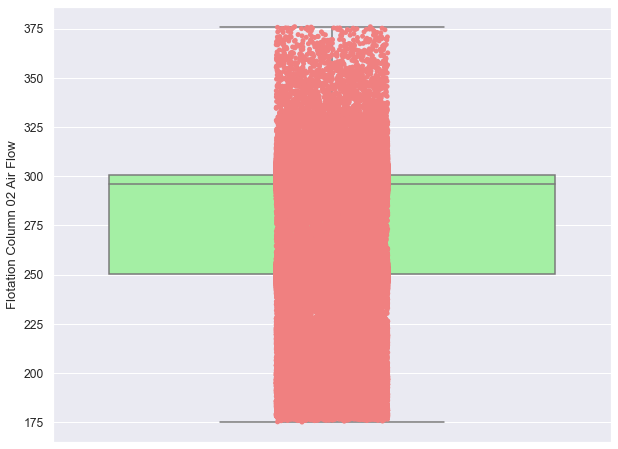

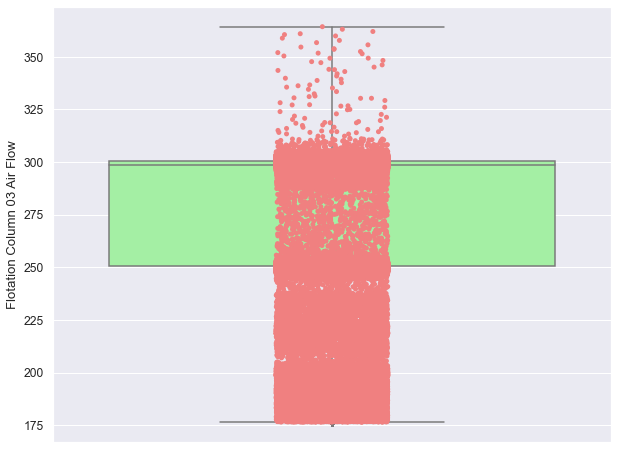

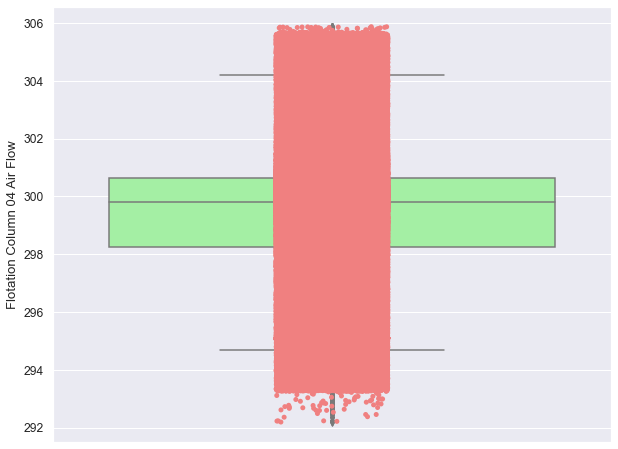

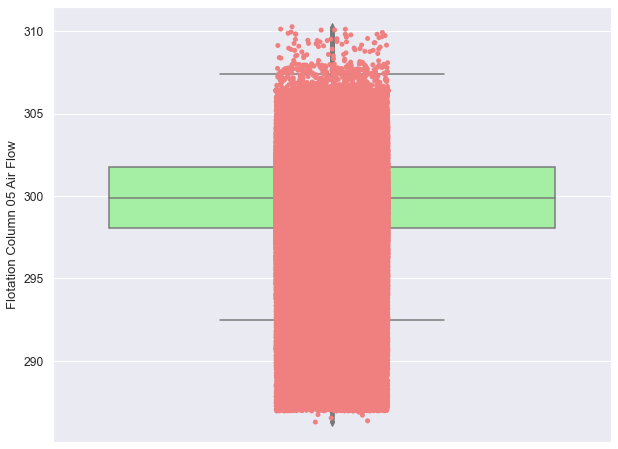

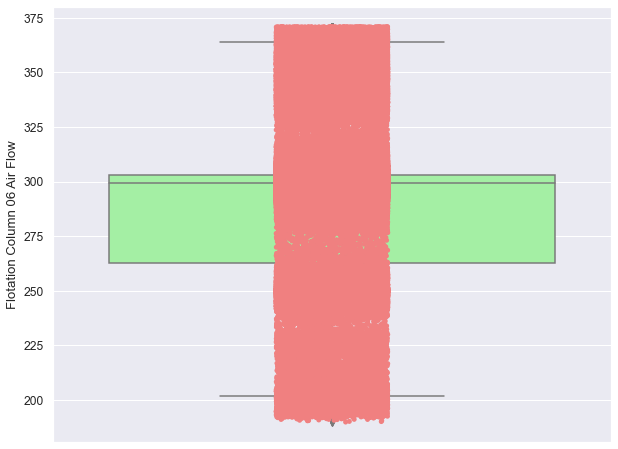

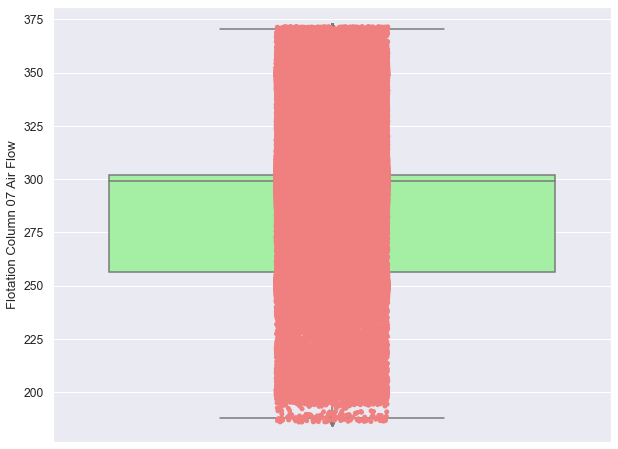

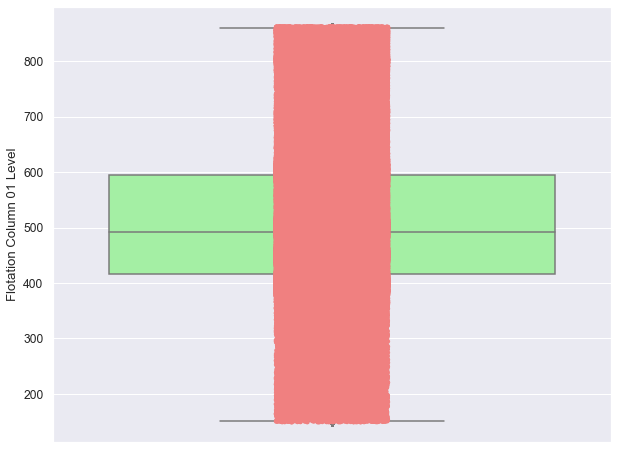

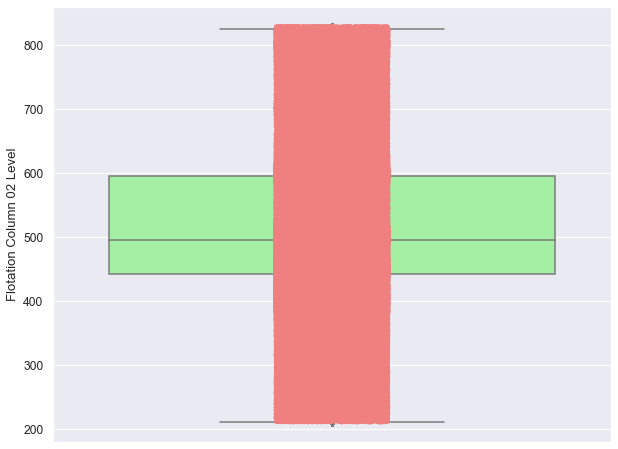

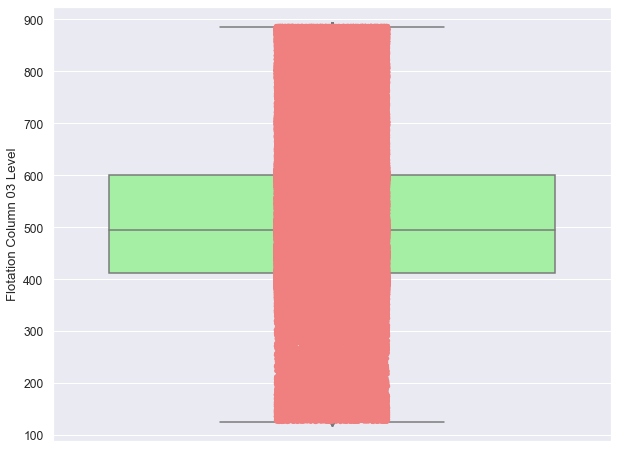

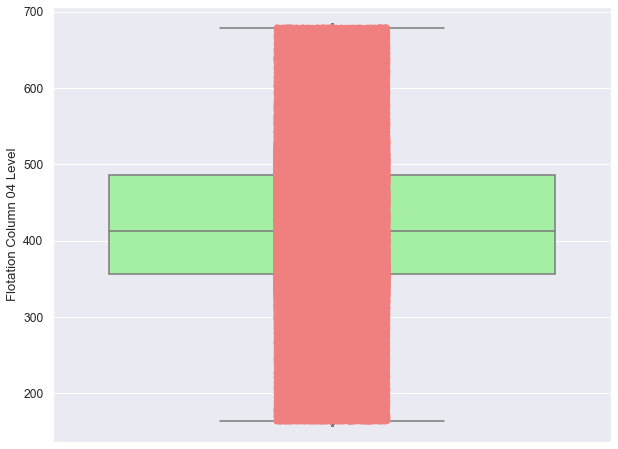

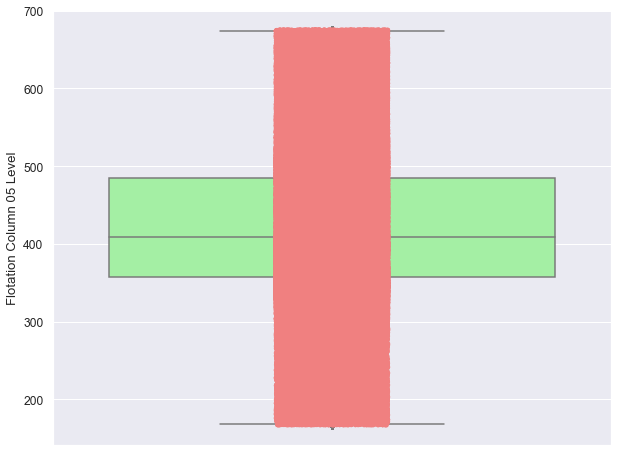

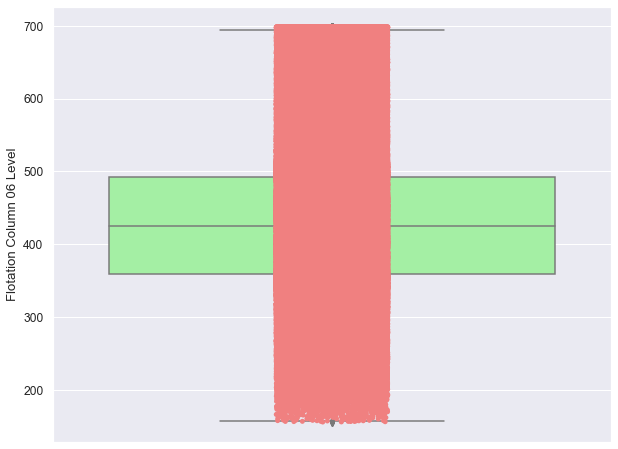

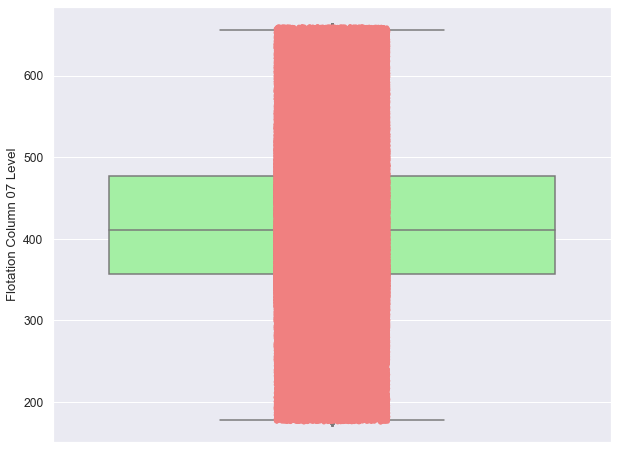

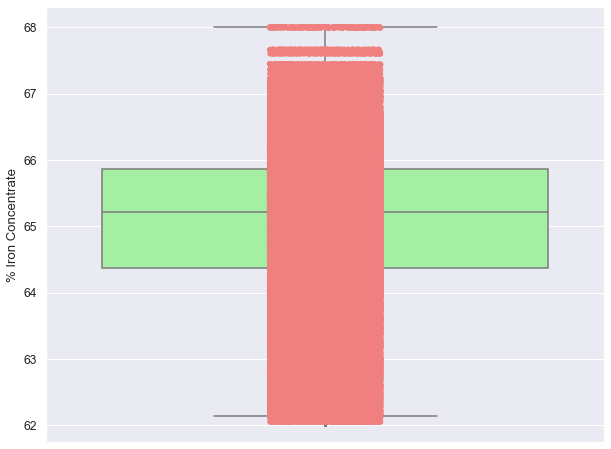

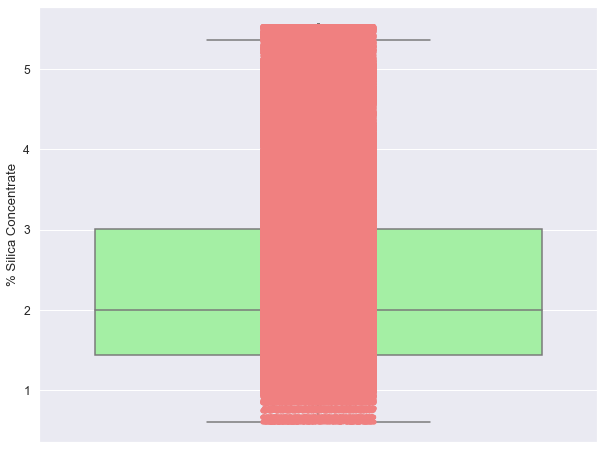

In [25]:
for column in columns:
    fig = plt.figure(figsize=(10,8))
    sns.boxplot(data = df , y = df[column],color='palegreen')
    sns.stripplot(data = df , y = df[column],color='lightcoral')

<Figure size 720x576 with 0 Axes>

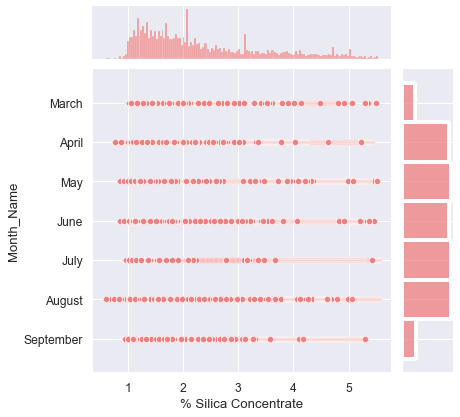

In [26]:
fig = plt.figure(figsize=(10,8))
sns.jointplot(data = df , y = "Month_Name" , x = "% Silica Concentrate",color='lightcoral')

<Figure size 720x576 with 0 Axes>

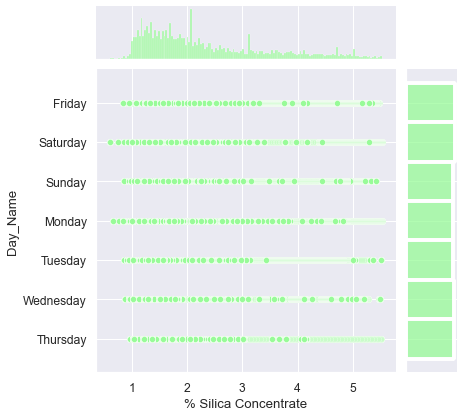

In [27]:
fig = plt.figure(figsize=(10,8))
sns.jointplot(data = df , y = "Day_Name" , x = "% Silica Concentrate",color='palegreen')

<Figure size 720x576 with 0 Axes>

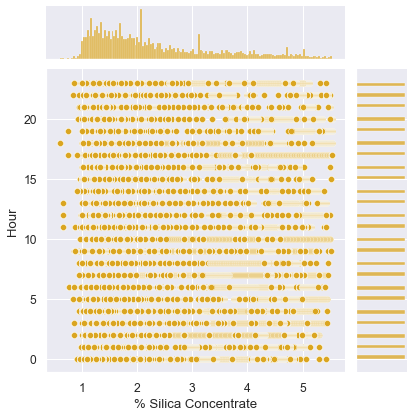

In [28]:
fig = plt.figure(figsize=(10,8))
sns.jointplot(data = df , y = "Hour" , x = "% Silica Concentrate",color='goldenrod')

C:\Users\oessa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


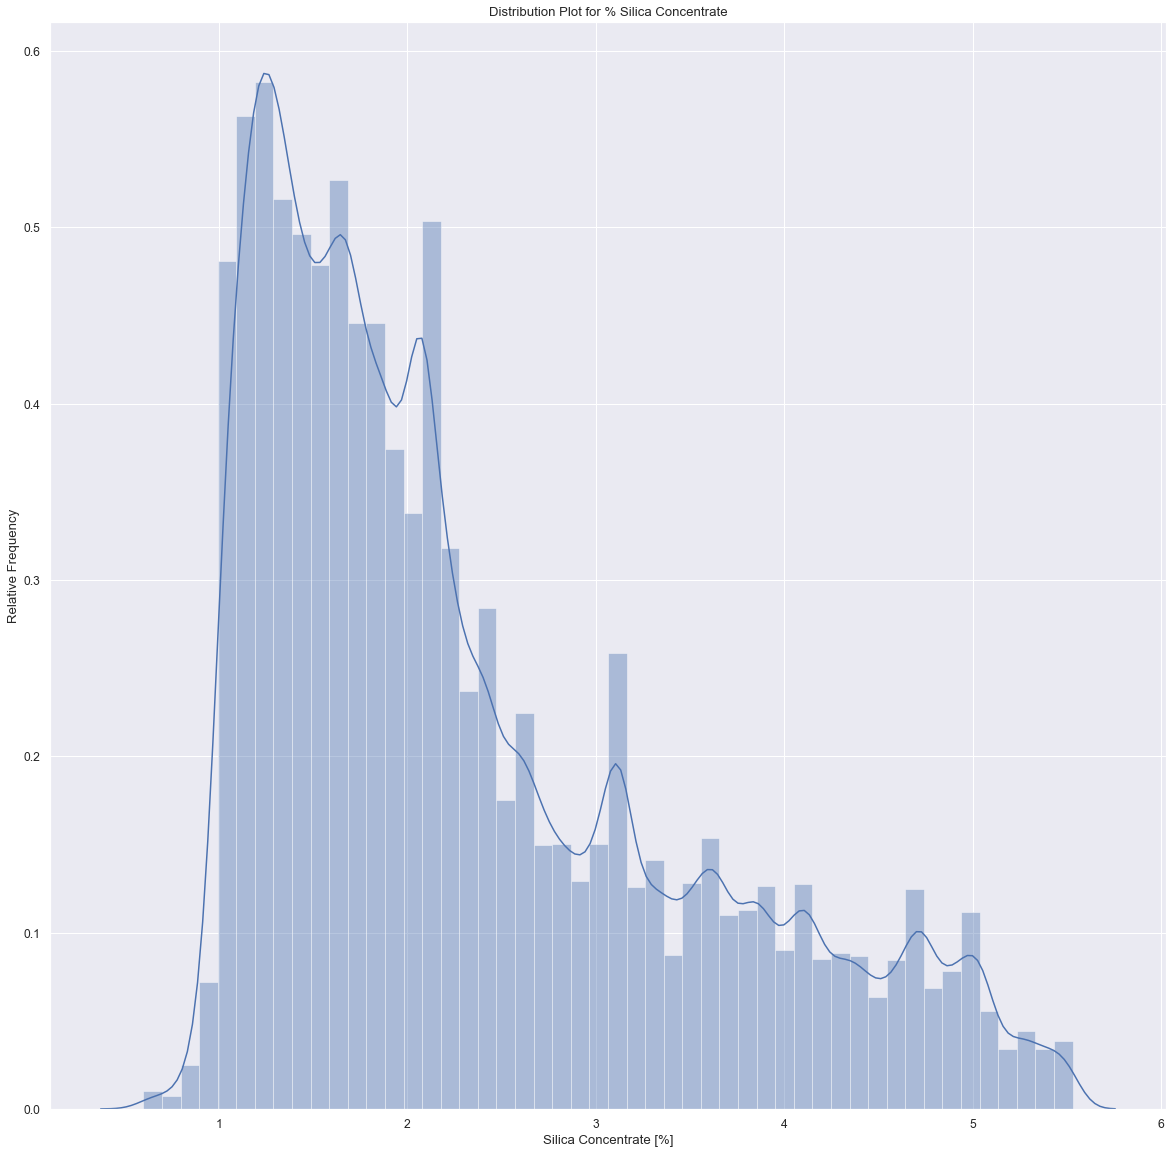

In [29]:
sns.distplot(df['% Silica Concentrate'])
plt.title('Distribution Plot for % Silica Concentrate')
plt.ylabel('Relative Frequency')
plt.xlabel('Silica Concentrate [%]')
plt.show()

C:\Users\oessa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


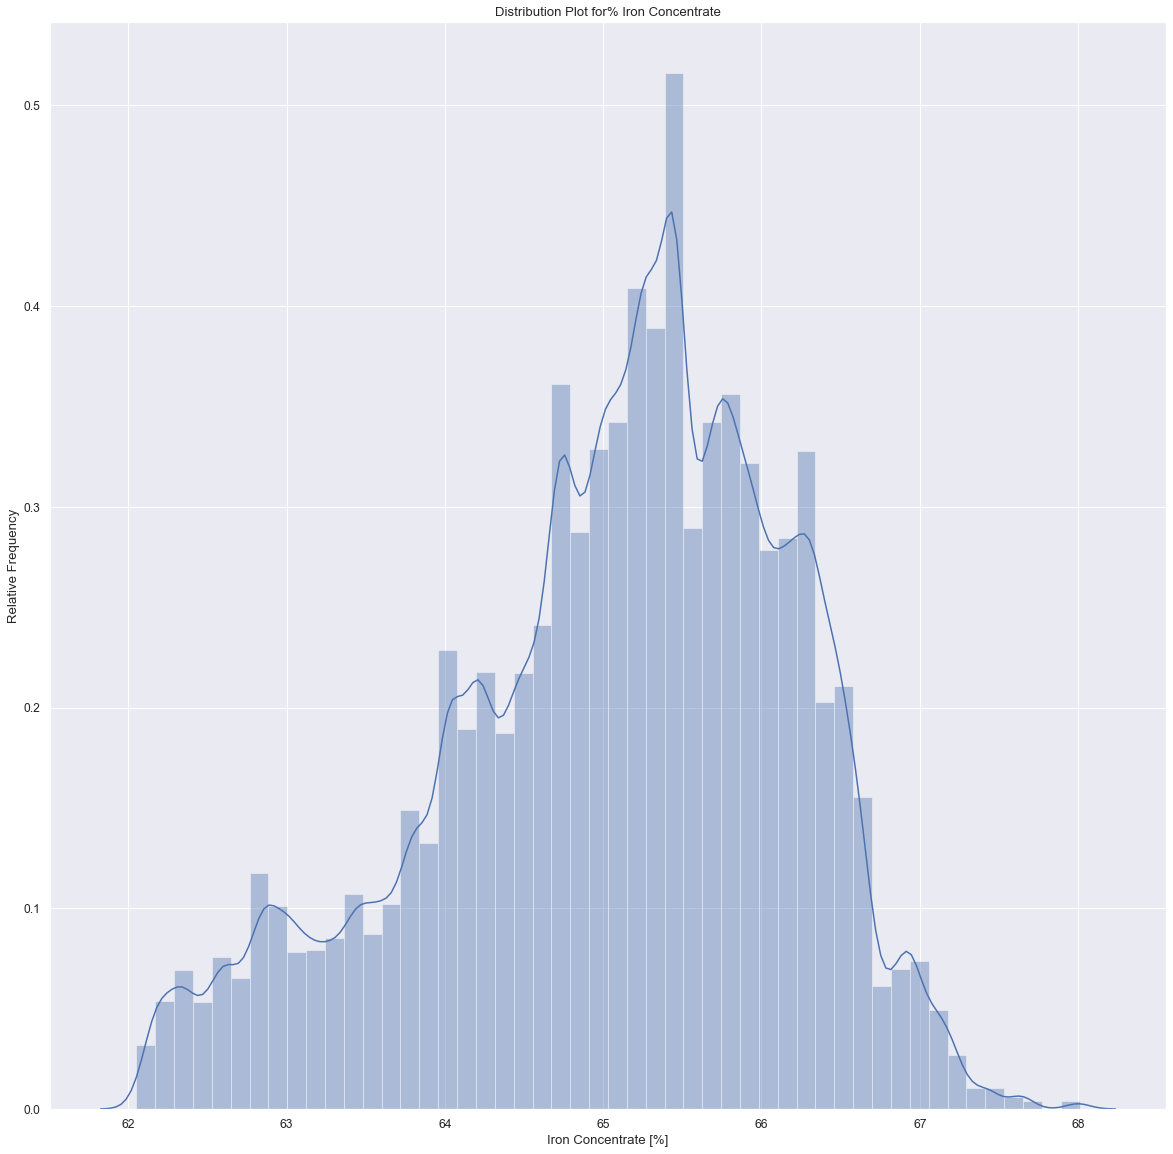

In [30]:
sns.distplot(df['% Iron Concentrate'])
plt.title('Distribution Plot for% Iron Concentrate')
plt.ylabel('Relative Frequency')
plt.xlabel('Iron Concentrate [%]')
plt.show()

**no outliers detected**

## Missing Value


In [31]:
#Check Missing Value
df.isna().sum()

% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
Month_Name                      0
Day_Name                        0
Hour                            0
dtype: int64

## Duplicate Value  to prevent data leakage

In [32]:
#Check Duplicate Value
df.duplicated().sum()

1171

In [33]:
#Remove Duplicate Value
df.drop_duplicates(inplace = True)
#Check Duplicate Value
df.duplicated().sum()

0

### Nominal Feature

In [34]:
df = pd.get_dummies(df , columns=["Month_Name","Day_Name" , "Hour"] , drop_first=True)
df

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  Ore Pulp Flow  \
0             55.20          16.98      3019.53     557.434        395.713   
1             55.20          16.98      3024.41     563.965        397.383   
2             55.20          16.98      3043.46     568.054        399.668   
3             55.20          16.98      3047.36     568.665        397.939   
4             55.20          16.98      3033.69     558.167        400.254   
...             ...            ...          ...         ...            ...   
737448        49.75          23.20      2710.94     441.052        386.570   
737449        49.75          23.20      2692.01     473.436        384.939   
737450        49.75          23.20      2692.20     500.488        383.496   
737451        49.75          23.20      1164.12     491.548        384.976   
737452        49.75          23.20      1164.12     468.019        384.801   

        Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0          10.06640           1.74000                       249.214   
1          10.06720           1.74000                       249.719   
2          10.06800           1.74000                       249.741   
3          10.06890           1.74000                       249.917   
4          10.06970           1.74000                       250.203   
...             ...               ...                           ...   
737448      9.62129           1.65365                       302.344   
737449      9.62063           1.65352                       303.013   
737450      9.61874           1.65338                       303.662   
737451      9.61686           1.65324                       302.550   
737452      9.61497           1.65310                       300.355   

        Flotation Column 02 Air Flow  Flotation Column 03 Air Flow  ...  \
0                            253.235                       250.576  ...   
1                            250.532                       250.862  ...   
2                            247.874                       250.313  ...   
3                            254.487                       250.049  ...   
4                            252.136                       249.895  ...   
...                              ...                           ...  ...   
737448                       298.786                       299.163  ...   
737449                       301.879                       299.487  ...   
737450                       307.397                       299.487  ...   
737451                       301.959                       298.045  ...   
737452                       292.865                       298.625  ...   

        Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  Hour_19  Hour_20  \
0             0        0        0        0        0        0        0   
1             0        0        0        0        0        0        0   
2             0        0        0        0        0        0        0   
3             0        0        0        0        0        0        0   
4             0        0        0        0        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
737448        0        0        0        0        0        0        0   
737449        0        0        0        0        0        0        0   
737450        0        0        0        0        0        0        0   
737451        0        0        0        0        0        0        0   
737452        0        0        0        0        0        0        0   

        Hour_21  Hour_22  Hour_23  
0             0        0        0  
1             0        0        0  
2             0        0        0  
3             0        0        0  
4             0        0        0  
...         ...      ...      ...  
737448        0        0        1  
737449        0        0        1  
737450        0        0        1  
737451        0        0        1  
737452        0        0        1  

[736282

In [35]:
df.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate', 'Month_Name_August',
       'Month_Name_July', 'Month_Name_June', 'Month_Name_March',
       'Month_Name_May', 'Month_Name_September', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_

In [36]:
data = 0

In [37]:
df.insert(29,"Month_Name_January", data)
df.insert(30,"Month_Name_February", data)
df.insert(31,"Month_Name_April", data)
df.insert(32,"Month_Name_November", data)
df.insert(33,"Month_Name_October", data)
df.insert(34,"Month_Name_December", data)
df.insert(36,"Day_Name_Friday", data)
df.insert(65,"Hour_24", data)


In [38]:
df.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate', 'Month_Name_August',
       'Month_Name_July', 'Month_Name_June', 'Month_Name_March',
       'Month_Name_May', 'Month_Name_September', 'Month_Name_January',
       'Month_Name_February', 'Month_Name_April', 'Month_Name_November',
       'Month_Name_October', 'Month_Name_December', 'Day_Name_Monday',
       'Day_Name_Friday', 'Day_Name_Saturda

In [39]:
df.head()

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  Ore Pulp Flow  \
0         55.2          16.98      3019.53     557.434        395.713   
1         55.2          16.98      3024.41     563.965        397.383   
2         55.2          16.98      3043.46     568.054        399.668   
3         55.2          16.98      3047.36     568.665        397.939   
4         55.2          16.98      3033.69     558.167        400.254   

   Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0      10.0664              1.74                       249.214   
1      10.0672              1.74                       249.719   
2      10.0680              1.74                       249.741   
3      10.0689              1.74                       249.917   
4      10.0697              1.74                       250.203   

   Flotation Column 02 Air Flow  Flotation Column 03 Air Flow  ...  Hour_15  \
0                       253.235                       250.576  ...        0   
1                       250.532                       250.862  ...        0   
2                       247.874                       250.313  ...        0   
3                       254.487                       250.049  ...        0   
4                       252.136                       249.895  ...        0   

   Hour_16  Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   Hour_24  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 66 columns]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736282 entries, 0 to 737452
Data columns (total 66 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   736282 non-null  float64
 1   % Silica Feed                 736282 non-null  float64
 2   Starch Flow                   736282 non-null  float64
 3   Amina Flow                    736282 non-null  float64
 4   Ore Pulp Flow                 736282 non-null  float64
 5   Ore Pulp pH                   736282 non-null  float64
 6   Ore Pulp Density              736282 non-null  float64
 7   Flotation Column 01 Air Flow  736282 non-null  float64
 8   Flotation Column 02 Air Flow  736282 non-null  float64
 9   Flotation Column 03 Air Flow  736282 non-null  float64
 10  Flotation Column 04 Air Flow  736282 non-null  float64
 11  Flotation Column 05 Air Flow  736282 non-null  float64
 12  Flotation Column 06 Air Flow  736282 non-nul

In [41]:
df.rename(columns = {"% Iron Feed": "Iron_Feed" , "% Silica Feed":"Silica_Feed", "Starch Flow":"Starch_Flow", "Amina Flow":"Amina_Flow", "Ore Pulp Flow":"Ore_Pulp_Flow", "Ore Pulp pH":"Ore_Pulp_pH", "Ore _Pulp Density":"Ore_Pulp_Density", "Flotation Column 01 Air Flow":"Flotation_Column_01_Air_Flow","Flotation Column 02 Air Flow":"Flotation_Column_02_Air_Flow", "Flotation Column 03 Air Flow":"Flotation_Column_03_Air_Flow", "Flotation Column 04 Air Flow":"Flotation_Column_04_Air_Flow", "Flotation Column 05 Air Flow":"Flotation_Column_05_Air_Flow", "Flotation Column 06 Air Flow":"Flotation_Column_06_Air_Flow", "Flotation Column 07 Air Flow":"Flotation_Column_07_Air_Flow", "Flotation Column 01 Level":"Flotation_Column_01_Level", "Flotation Column 02 Level":"Flotation_Column_02_Level", "Flotation Column 03 Level":"Flotation_Column_03_Level", "Flotation Column 04 Level":"Flotation_Column_04_Level", "Flotation Column 05 Level":"Flotation_Column_05_Level", "Flotation Column 06 Level":"Flotation_Column_06_Level", "Flotation Column 07 Level":"Flotation_Column_07_Level"}, inplace=True)
df.columns

Index(['Iron_Feed', 'Silica_Feed', 'Starch_Flow', 'Amina_Flow',
       'Ore_Pulp_Flow', 'Ore_Pulp_pH', 'Ore Pulp Density',
       'Flotation_Column_01_Air_Flow', 'Flotation_Column_02_Air_Flow',
       'Flotation_Column_03_Air_Flow', 'Flotation_Column_04_Air_Flow',
       'Flotation_Column_05_Air_Flow', 'Flotation_Column_06_Air_Flow',
       'Flotation_Column_07_Air_Flow', 'Flotation_Column_01_Level',
       'Flotation_Column_02_Level', 'Flotation_Column_03_Level',
       'Flotation_Column_04_Level', 'Flotation_Column_05_Level',
       'Flotation_Column_06_Level', 'Flotation_Column_07_Level',
       '% Iron Concentrate', '% Silica Concentrate', 'Month_Name_August',
       'Month_Name_July', 'Month_Name_June', 'Month_Name_March',
       'Month_Name_May', 'Month_Name_September', 'Month_Name_January',
       'Month_Name_February', 'Month_Name_April', 'Month_Name_November',
       'Month_Name_October', 'Month_Name_December', 'Day_Name_Monday',
       'Day_Name_Friday', 'Day_Name_Saturday', 

## Splitting Data

In [42]:
x = df.drop(columns=["% Silica Concentrate" , "% Iron Concentrate"])


In [43]:
y = df["% Silica Concentrate"]


In [44]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.05 , random_state = True)

In [45]:
df.shape

(736282, 66)

## Scalling Data

In [46]:
scaler = StandardScaler()
scaler.fit(x_train)


StandardScaler()

In [47]:
x_train = scaler.transform(x_train)


In [48]:
x_test =scaler.transform(x_test)

# Modeling

**Model Evaluation**

In [49]:
#Best Feature Importance Evaluation
"""
models = {
    "RF": RandomForestRegressor(),
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "XGBR": XGBRegressor()
} 
"""

'\nmodels = {\n    "RF": RandomForestRegressor(),\n    "LR": LinearRegression(),\n    "KNNR" : KNeighborsRegressor(), \n    "SVR": SVR(),\n    "DT": DecisionTreeRegressor(),\n    "XGBR": XGBRegressor()\n} \n'

In [50]:
"""
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('-'*30)
"""

"\nfor name, model in models.items():\n    print(f'Using model: {name}')\n    model.fit(x_train, y_train)\n    print(f'Training Score: {model.score(x_train, y_train)}')\n    print(f'Test Score: {model.score(x_test, y_test)}')  \n    print('-'*30)\n"

In [51]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
print("By Using A decision tree regressor Model:-")
print(f'Training Score: {model.score(x_train, y_train)}')
print(f'Test Score: {model.score(x_test, y_test)}') 
y_pred = model.predict(x_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')


By Using A decision tree regressor Model:-
Training Score: 1.0
Test Score: 0.9850835519614541
RMSE: 0.13772652737778887


In [52]:
x.columns

Index(['Iron_Feed', 'Silica_Feed', 'Starch_Flow', 'Amina_Flow',
       'Ore_Pulp_Flow', 'Ore_Pulp_pH', 'Ore Pulp Density',
       'Flotation_Column_01_Air_Flow', 'Flotation_Column_02_Air_Flow',
       'Flotation_Column_03_Air_Flow', 'Flotation_Column_04_Air_Flow',
       'Flotation_Column_05_Air_Flow', 'Flotation_Column_06_Air_Flow',
       'Flotation_Column_07_Air_Flow', 'Flotation_Column_01_Level',
       'Flotation_Column_02_Level', 'Flotation_Column_03_Level',
       'Flotation_Column_04_Level', 'Flotation_Column_05_Level',
       'Flotation_Column_06_Level', 'Flotation_Column_07_Level',
       'Month_Name_August', 'Month_Name_July', 'Month_Name_June',
       'Month_Name_March', 'Month_Name_May', 'Month_Name_September',
       'Month_Name_January', 'Month_Name_February', 'Month_Name_April',
       'Month_Name_November', 'Month_Name_October', 'Month_Name_December',
       'Day_Name_Monday', 'Day_Name_Friday', 'Day_Name_Saturday',
       'Day_Name_Sunday', 'Day_Name_Thursday', 'Day_N

In [53]:
##enter new data
data = [60.6522 , 10.514 , 1200.21, 302.515 , 551.64 , 15.21, 8.51 , 200, 250.21 , 121 , 210, 321.2154, 485.11, 451.041 , 422.121 , 165.152 ,154.155 ,410 , 641 , 415 , 721 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ,0 , 0 , 0 , 0 , 0 , 0 , 0]

In [54]:
# Apply Scaling a new data
data = scaler.transform([data]) 


In [55]:
# predect pecentage of silica for the new data
model.predict(data)[0]


1.47

## Deployment 

In [56]:
joblib.dump(model, 'model.h5')

['model.h5']

In [57]:
joblib.dump(scaler, 'scaling.h5')

['scaling.h5']

In [58]:
joblib.dump(x.columns, 'columns.h5')

['columns.h5']